# Support Vector Machines

The term Support Vector Machines (SVM's) is sometimes used loosely to refer to three methods:
- Maximal margin classifier,
- Support vector classifier,
- Support vector machine. 

Each are an extension of the previous method, allowing them to be applied to a broader range of cases.

Support Vector Machines (SVM) are a common discriminative algorithm, well suited to *complex* small- to medium sized datasets<sup>Géron</sup>, which aim to find a hyperplane that provides the maximum margin of separation between classes of objects. 

They can be used for both __classification__ and regression.

**NOTES**
- Nearly all statys sections are from Intro to stats learning so make sure to reference them

**PLAN**
- Images from the Hands on machine learning (using the petal data)
- some explanation from the python ML
- structure of the Intro to stats learning & some algebra
- Some algebra from Machine learning: a probabilitistic perspective.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
from sklearn import datasets
from IPython.display import Image
from sklearn.svm import SVC, LinearSVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#!pip install mlxtend

In [2]:
iris = datasets.load_iris(as_frame=True)
iris_df = iris['data']
target = iris['target']

# Introduction

To demonstrate SVM's I'll be using Fisher's (or Anderson's) Iris flowers dataset<sup>Fisher</sup>.

- _"We will use a single example dealing with three species of the iris flower. This data comes from a famous experiment on a series of measurements of three species of iris flowers. R A Fisher, a statistically minded thinker in the early twentieth centure used this dataset in his 1936 paper The Use of multiple measurements in taxonomic problems, published in the Annals of Eugenics. We will begin by using this data to investigate some basic questions one might have about the data. These questions will not be limited to this dataset however, and we must note that there is some kind of relationship to Eugenics in the taxonomic problem for Fisher."_ https://bookdown.org/koehlerj/qr_book/introducing-the-iris-dataset.html

- We'll come back to this dataset when discussing clustering later as well.

- _"How to classify three species of Iris flowers (Versicolor, Setosa, and Virginica) without using labels"_

- _"The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species._
    
    _The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), and 150 records under five attributes - sepal length, sepal width, petal length, petal width and species. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters."_ https://cloudxlab.com/assessment/displayslide/5165/keras-project-iris-flower-identification-introduction-to-iris-dataset

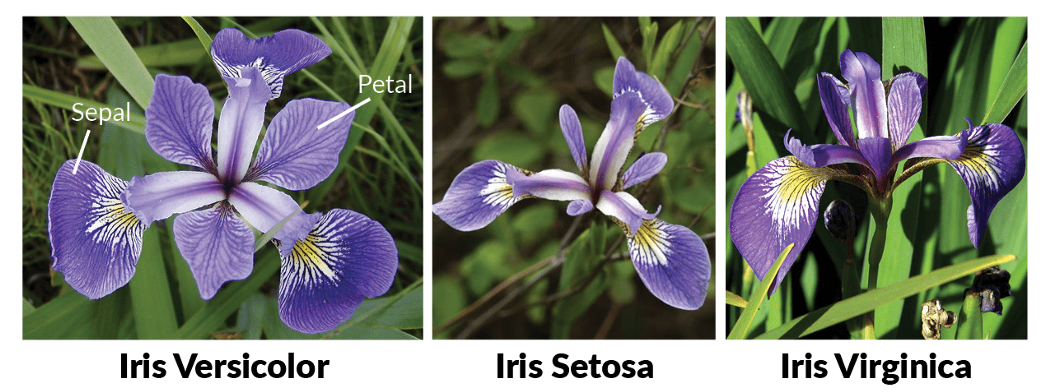

In [3]:
Image("1_2b9TA6i27eGjeDQE9qUaEg.png") # Image from: 

The data set consists of 50 samples from each of three species of Iris, with four features measured from each sample: the length and the width of the sepals and petals, in centimeters.

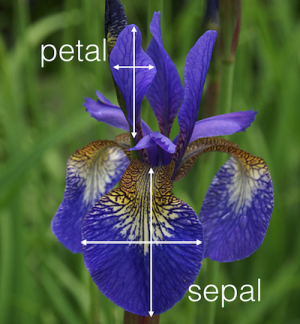

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
display(Image("03_iris.png")) # Image from: https://www.ritchieng.com/machine-learning-iris-dataset/
iris_df.head()

In [5]:
from sklearn.preprocessing import LabelEncoder

# get the labels of flowers capetalised for vidualisation
target_names = list(map(lambda s: s.capitalize(), iris['target_names']))

# create a dictionary with the original labels decoded (inverse of LabelEncoder)
decode_label = dict(zip(range(3), target_names))

# make a label encoder to use later if needed
le = LabelEncoder().fit(target_names)

decode_label

{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [6]:
# add the target labels to df for visualisation purposes
iris_vis = pd.concat([iris_df, target],axis=1)
# turn the ints to labels
iris_vis["target"] = iris_vis["target"].replace(decode_label)

iris_vis.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa

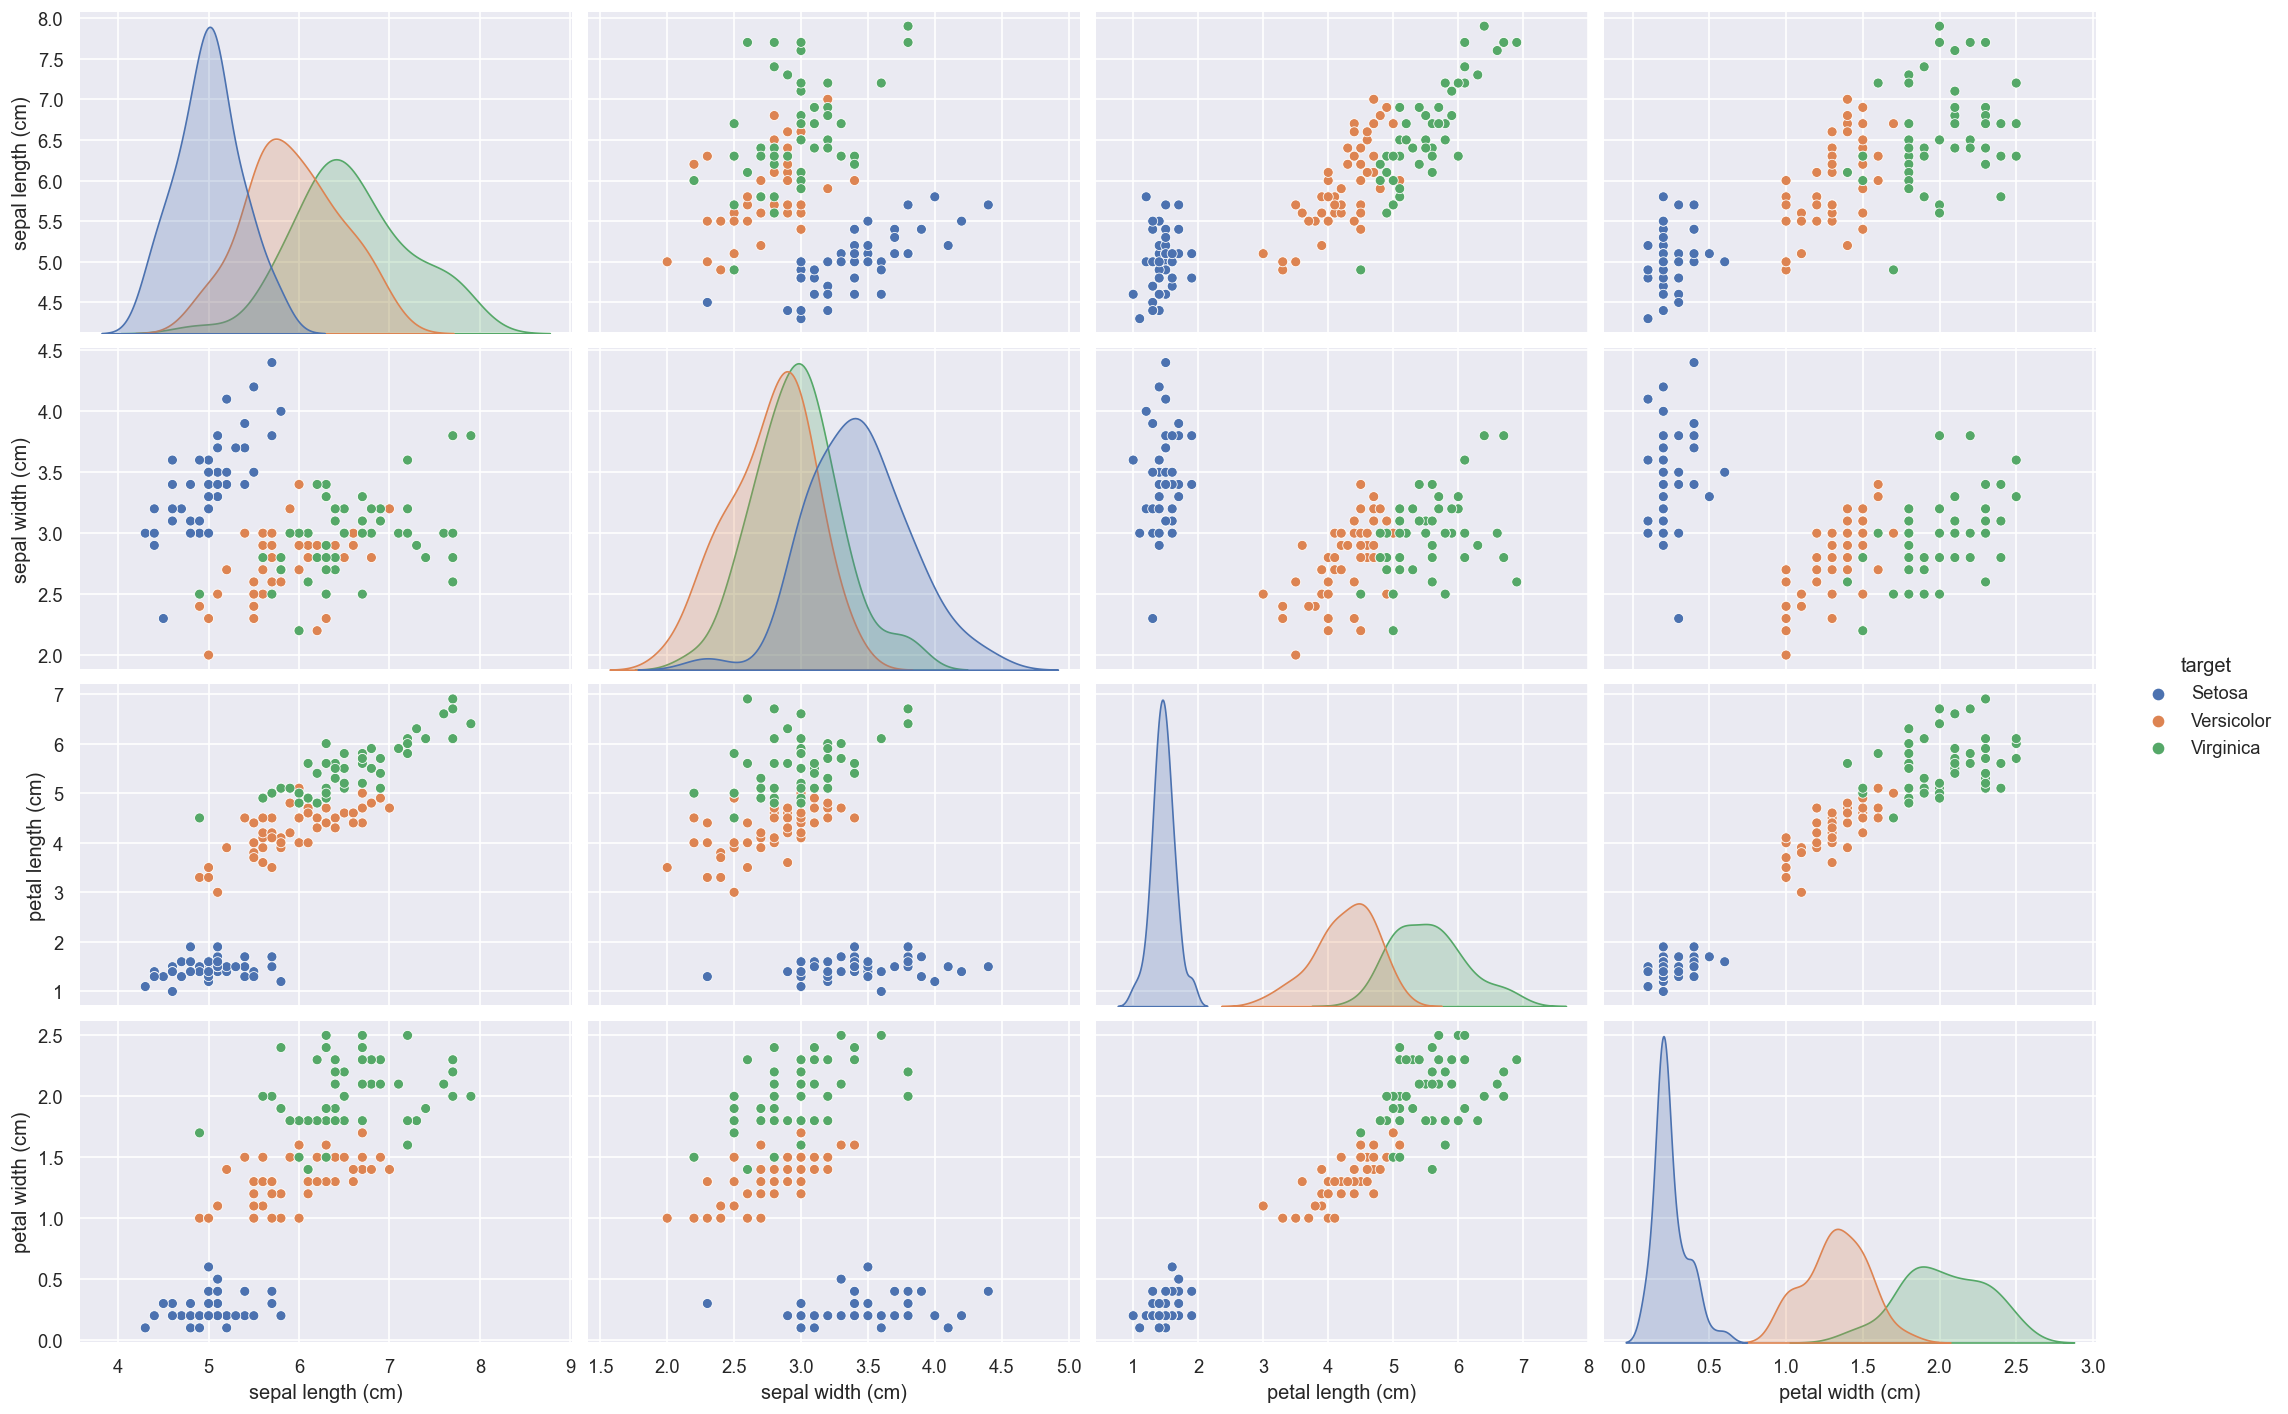

In [7]:
sns.pairplot(iris_vis, hue="target", height=3, aspect = 1.5)
plt.show()

In [8]:
set_versi = iris_vis[["petal length (cm)", "petal width (cm)", "target"]]
set_versi = set_versi[set_versi.target != "Virginica"]

def set_versi_plot():
    g = sns.scatterplot(data=set_versi, x = "petal length (cm)", 
                y = "petal width (cm)", hue="target", 
                style = "target")
    plt.axis([0, 5.5, 0, 2])
    plt.title("Petal lengths and widths of Setosa and Versicolor flowers")
    g.axes.get_legend().set_title(False)

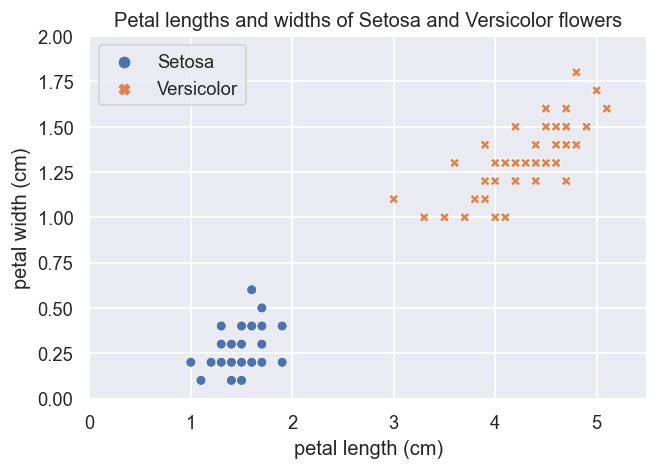

In [9]:
set_versi_plot()
plt.show()

In [10]:
# Altered https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.svm import SVC
x0 = np.linspace(0, 5.5, 200)
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

X = set_versi[["petal length (cm)", "petal width (cm)"]].values
y = le.transform(set_versi[["target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

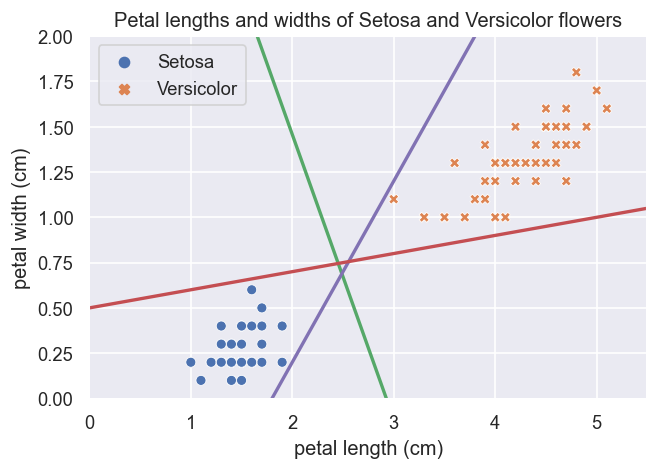

In [11]:
set_versi_plot()
plt.plot(x0, decision_boundary, "g-", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.show()

In [12]:
# Altered https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
# SVM Classifier model
svm_clf = SVC(kernel="linear", 
              C=float("inf") # Inf is for demo purposes (dont use in practice!)
             )
svm_clf.fit(X, y)
def plot_svc_decision_boundary(clf, xmin, xmax, highlight=True):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = clf.support_vectors_
    if highlight:
        g = sns.scatterplot(x = svs[:, 0], y = svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "g-", linewidth=2)
    plt.plot(x0, gutter_up, "r--", linewidth=2)
    plt.plot(x0, gutter_down, "r--", linewidth=2)

Here the middle thick line is a <span style="color:green">__hyperplane__</span> and the dashed outer lines are the edges of the <span style="color:red">__Margin__</span>.

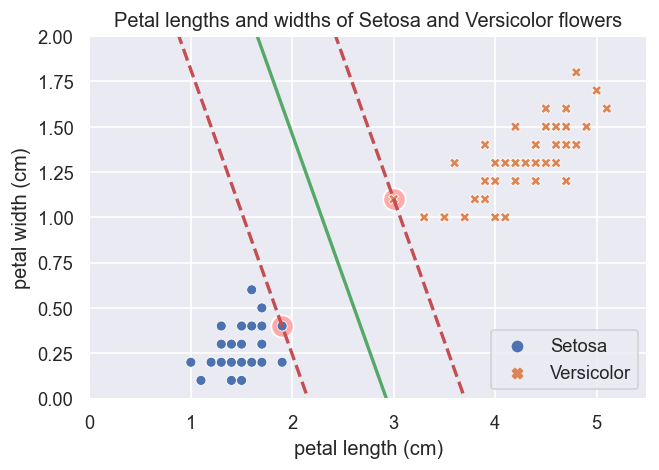

In [13]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
set_versi_plot()
plt.show()

## What is a Hyperplane?
In _p_-dimensional space, a hyperplane is a flat affine (does not need to pass through the origin) subspace of dimension p-1.

**Examples**
- *Two-dimensions*: A flat one-dimensional line (previous plots)
- *Three-dimensions*: A three-dimensional subspace (subsequent plot)
- *P-dimensions*: A P-dimensional subspace (...nope)

In [14]:
# Three Dimension
%matplotlib notebook

def three_dim():
    X = iris.data.values[:, :3]  # we only take the first three features.
    Y = iris.target

    # make it binary classification problem
    X = X[np.logical_or(Y==0,Y==1)]
    Y = Y[np.logical_or(Y==0,Y==1)]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    x = X[:, 0]
    y = X[:, 1]
    z = X[:, 2]

    ax.set_xlabel(iris_df.columns[0])
    ax.set_ylabel(iris_df.columns[1])
    ax.set_zlabel(iris_df.columns[2])

    ax.scatter(x, y, z)

    # SVM
    model = SVC(kernel='linear')
    clf = model.fit(X, Y)

    # The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
    # Solve for w3 (z)
    z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

    xm, xM = X[:,0].min(), X[:, 0].max()
    ym, yM = X[:,1].min(), X[:, 1].max()

    number_of_squares = 10
    x = np.linspace(xm, xM, number_of_squares)
    y = np.linspace(ym, yM, number_of_squares)
    x, y =np.meshgrid(x, y)
    ax.plot_surface(x, y, z(x,y), alpha=0.5)
    ax.view_init(elev=23., azim=168.)

    plt.show()

<IPython.core.display.Javascript object>


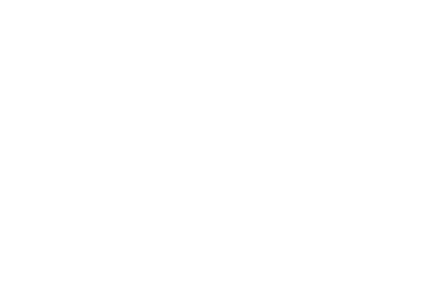

In [15]:
three_dim()

*Two-dimensions*: $\beta_0 + \beta_1X_1 + \beta_2X_2 = 0$

*Three-dimensions*: $\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 = 0$

*P-dimensions*: $\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p = 0$

---

If $X = (X_1, ..., X_p)^T$ satisfies above, then it is a point on the hyperplane.

If $\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p > 0$ it lies on one side of the hyperplane and $\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p < 0$ on the other. In-other-words p-dimensional space is dividided into two halves.

### Classifying data using a separating hyperplane
We aim to classify an $n \times p$ matrix of $n$ observations in $p$ dimensional space with these observations falling into two classes $y_1,...,y_n \in \{-1,1\}$.

If we were to perfectly separate the classes the hyperplane would have the property that

$\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip} > 0$ if $y_i = 1$,

and

$\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip} < 0$ if $y_i = -1$.

---

For new test observations $x^*$, we would assign it to class 1 if $f(x^*)$ is positive and class -1 if negative. Furthermore the magnitude of $f(x^*)$ can be used to indicate how far the point lies from the hyperplane.

## Exercises
[THEORY BASED!]

1.

2.

# Maximal Margin Classifier
We need a reasonable way of constucting a hyperplane, out of the possible choices.

Maximumal margin hyperplanes look at getting the hyperplane that is the furthest from the training obeservations - we compute the perpendicular distance from each training observation to a given separating hyperplane. The maximal margin hyperplane is the separating hyperplane for which the margin is largest.

We hope the classifier with a large margin on the training data will generalise well to unseen test observations.

In [16]:
%matplotlib inline
def plot_svc_margin(clf, xmin, xmax, highlight=False):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = clf.support_vectors_
    
    with sns.axes_style("dark"):
        plt.fill_between(x0, gutter_down, facecolors='white')
        plt.fill_between(x0, gutter_up, xmax, facecolors='white')
        if highlight:
            g = sns.scatterplot(x = svs[:, 0], y = svs[:, 1], s=180, facecolors='#FFAAAA')
        plt.plot(x0, decision_boundary, "g-", linewidth=2)
        plt.plot(x0, gutter_up, "r--", linewidth=2)
        plt.plot(x0, gutter_down, "r--", linewidth=2)
        plt.arrow(svs[0, 0],svs[0, 1], 0.65, 0.15, fc='k', ec='k', linewidth=1, length_includes_head=True)
        plt.arrow(svs[1, 0],svs[1, 1], -0.65, -0.15, fc='k', ec='k', linewidth=1, length_includes_head=True)

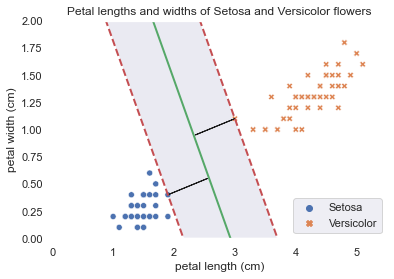

In [17]:
plot_svc_margin(svm_clf, 0, 5.5)
set_versi_plot()
plt.show()

We can see below there are two equidistant points from the maximal margin hyperplane, lying on the dashed lines. There observations are called *Support Vectors*, as if these moved so would the hyperplane.

The maximal margin hyperplane only depends on these support vectors, meaning other points could be moved without the hyperplane moving.

**[Maybe add the about all other weights being 0 from other lecture]**

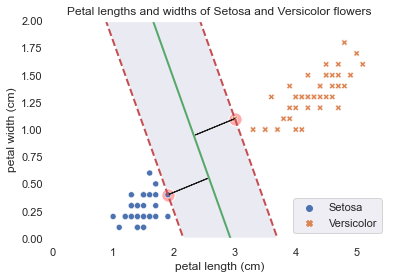

In [18]:
plot_svc_margin(svm_clf, 0, 5.5, highlight=True)
set_versi_plot()
plt.show()

This maximal margin hyperplane is the solution to the optemisation problem for choosing $\beta_0,\beta_1, ...\beta_p$ to maximise $M$,

subject to $\sum^p_{j=1}\beta^2_j = 1$,

$\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_pX_{ip} \geq M \quad \forall i = 1,...,n$

The constraints above just ensure that each observation is on the correct side of the hyperplane and at least a distance $M$ from the hyperplane; meaning $M$ represents our hyperplane.

- $\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip} \geq M \quad \forall i = 1,...,n$ guarentees each datapoint is on the correct side of the hyperplane if M is posaative
- the constraint $\sum^p_{j=1}\beta^2_j = 1$, can be used to show that the perpendicular distance from the $i$th observation to the hyperplane is given by $y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip})$

### Limitations

However this method is sensitive to outliers. In figure X, we can see that the reliance on a small number of observations means there is now a small margin. We want to be confident that a distance from the hyperlane is a measure of our confidence in its classificaion, and that we have no overfit to our training data.

In other cases, no exact linear separating hyperplane exists (so no solution to $M > 0$). Therefore we may want to use a hyperplane that *almost* separates the two classes, allowing some errors, using a *soft margin* (Support Vector Classifier).

Furthermore, if $P$ is large, this approach often leads to overfitting.

In [19]:
%matplotlib inline
# adapted from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb


def outlier_margin():
    X = set_versi[["petal length (cm)", "petal width (cm)"]].values
    y = le.transform(set_versi[["target"]].values.ravel())
    X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
    y_outliers = np.array([0, 0])
    Xo = np.concatenate([X, X_outliers[1:]], axis=0)
    yo = np.concatenate([y, y_outliers[1:]], axis=0)

    svm_clf = SVC(kernel="linear", C=float("inf"))
    svm_clf.fit(Xo, yo)

    plot_svc_decision_boundary(svm_clf, 0, 5.5)
    g = sns.scatterplot(x = Xo[:,0], y = Xo[:,1], hue=yo, style = yo)
    leg = g.axes.get_legend()
    new_labels = ['Setosa', 'Versicolor']
    for t, l in zip(leg.texts, new_labels): t.set_text(l)
    plt.axis([0, 5.5, 0, 2])
    plt.title("Figure X: Effect of outliers")
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")
    
def soft_margin(title, hyperplane=False):
    virgin_versi = iris_vis[["petal length (cm)", "petal width (cm)", "target"]]
    virgin_versi = virgin_versi[virgin_versi.target != "Setosa"]

    X = virgin_versi[["petal length (cm)", "petal width (cm)"]].values
    y = virgin_versi[["target"]].replace({'Versicolor':0, 'Virginica':1}).values.ravel()
    
    if hyperplane:
        svm_clf = SVC(kernel="linear", C=100)
        svm_clf.fit(X, y)

        plot_svc_decision_boundary(svm_clf, 2.9, 7)
    labels = virgin_versi[["target"]].values.ravel()
    sns.scatterplot(x = X[:,0], y = X[:,1], hue=labels, style = labels)
    plt.axis([2.9, 7, 0.9, 2.75])
    plt.title(title)
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")

def hard_margin_limits():
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    plt.sca(axes[0])
    outlier_margin()
    
    plt.sca(axes[1])
    soft_margin("No exact linear separating hyperplane")

    plt.show()
    plt.close()

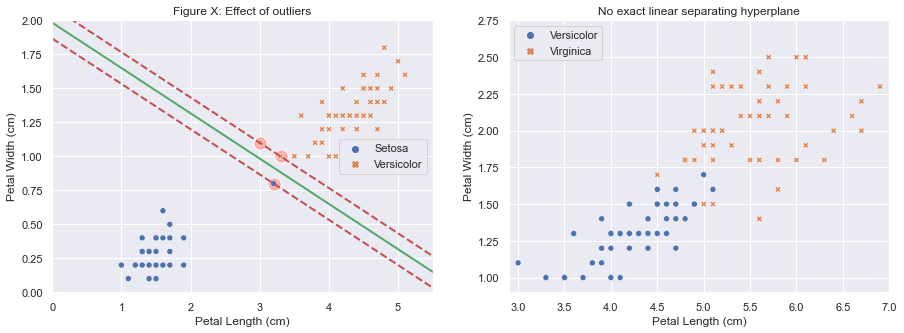

In [20]:
hard_margin_limits()

## Exercises

1. Describe what a support vector is.

2. In the plot below, which points are the "support vectors"?

3. [INSERT]

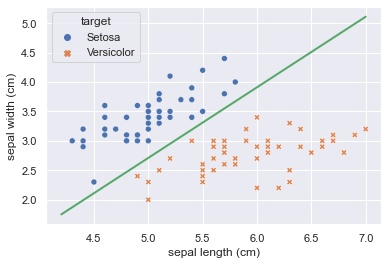

In [21]:
# QUESTION 2
exersise_ = iris_vis[["sepal length (cm)", "sepal width (cm)", "target"]]
exersise_ = exersise_[exersise_.target != "Virginica"]

X = exersise_[["sepal length (cm)", "sepal width (cm)"]].values
y = le.transform(exersise_[["target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(4.2, 7, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

plt.plot(x0, decision_boundary, "g-", linewidth=2)
g = sns.scatterplot(data=exersise_, x = "sepal length (cm)", 
                y = "sepal width (cm)", hue="target", 
                style = "target")

## Exercise Answers
1. A support vector is...
2. It uses more than 1 here, although which ones are quite tricky to desern so dont worry if you got a few of the blue points wrong!

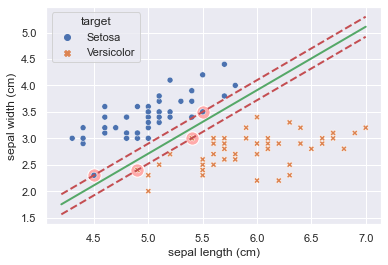

In [22]:
# ANSWERS 2
exersise_ = iris_vis[["sepal length (cm)", "sepal width (cm)", "target"]]
exersise_ = exersise_[exersise_.target != "Virginica"]

X = exersise_[["sepal length (cm)", "sepal width (cm)"]].values
y = le.transform(exersise_[["target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
plot_svc_decision_boundary(svm_clf, 4.2, 7)
g = sns.scatterplot(data=exersise_, x = "sepal length (cm)", 
                y = "sepal width (cm)", hue="target", 
                style = "target")

# Support Vector Classifier (SVC)

SVC's are a generalisation and extension of the maximal margin classifier so it can be applied to a broader range of cases<sup>James</sup>.

In practice they are more robust to individual observations and better classify most training observations than the Maximal Margin Classifier. This is because they take the approach it is better to missclassify some training examples in order to do a better job classifying the rest.

This is called a *soft margin* as it allows some violations by the training data by a small subset of training observation, not only on the wrong side of the margin, but wrong side of the hyperplane.

- "Developed in the computer science community in the 1990s"<sup>Géron</sup>
- Not always the data could be perfectly separated by a K − 1 dimensional hyperplane. To overcome this problem we could either tweak the constraints on the hyperplane to allow some points to be misclassified (soft margin) or alternatively we could transform the data to be separable by a hyperplane in another space (kernel method).

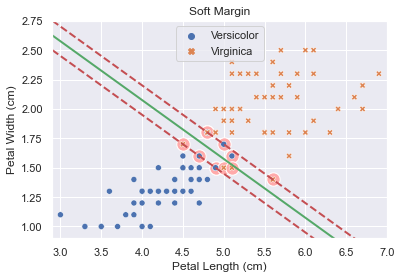

In [23]:
soft_margin("Soft Margin", hyperplane=True)
plt.show()

This is the solution to the optimisation problem for choosing $\beta_0,\beta_1, ...\beta_p$, with a slack variable $\epsilon_1,..., \epsilon_n$, to maximise $M$,

subject to $\sum^p_{j=1}\beta^2_j = 1$,

$\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_pX_{ip} \geq M(1-\epsilon_i)$,

$\epsilon \geq 0$, $\sum^n_{i=1}\epsilon_i \leq C$,

where $C$ is a nonnegative tuning parameter.

---
$\epsilon_i$ tells us where the $i$th observation is located relative to the hyperplane; $\epsilon_i = 0$ being on the correct side of the margin, $\epsilon_i > 0$ being on the wrong side of the margin, and $\epsilon_i > 1$ on the wrong side of the hyperplane.

$\epsilon_1 = ... = \epsilon_n = 0$ is the maximal margin hyperplane optimisation.

- slack variable $\epsilon_1,..., \epsilon_n$ allow individual observations to be on the wrong side of the margin or hyperplane.
- test observations are classified as before, $f(x^*) = \beta_0 + \beta_1x^*_1 + ... + \beta_px^*_p$

## Tuning Parameter (C)

$C$ bounds the sum of $\epsilon_i$'s, so a smaller C creates a wider boundary with a larger number of, and more severe, margin violations. $C$ can therefore be viewed as a budget for violations to the margin.

However, in Sci-kit learn _"the strength of the regularization is inversely proportional to C"_!

__[EXPLAIN WHY THIS IS THE CASE]__

In [24]:
def soft_margin(c_list):
    virgin_versi = iris_vis[["petal length (cm)", "petal width (cm)", "target"]]
    virgin_versi = virgin_versi[virgin_versi.target != "Setosa"]

    X = virgin_versi[["petal length (cm)", "petal width (cm)"]].values
    y = virgin_versi[["target"]].replace({'Versicolor':0, 'Virginica':1}).values.ravel()

    scaler = StandardScaler()
    svm_clf1 = LinearSVC(C=c_list[0], loss="hinge", random_state=42)
    svm_clf2 = LinearSVC(C=c_list[1], loss="hinge", random_state=42)

    scaled_svm_clf1 = Pipeline([
            ("scaler", scaler),
            ("linear_svc", svm_clf1),
        ])
    scaled_svm_clf2 = Pipeline([
            ("scaler", scaler),
            ("linear_svc", svm_clf2),
        ])

    scaled_svm_clf1.fit(X, y)
    scaled_svm_clf2.fit(X, y)

    # Convert to unscaled parameters
    b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
    b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
    w1 = svm_clf1.coef_[0] / scaler.scale_
    w2 = svm_clf2.coef_[0] / scaler.scale_
    svm_clf1.intercept_ = np.array([b1])
    svm_clf2.intercept_ = np.array([b2])
    svm_clf1.coef_ = np.array([w1])
    svm_clf2.coef_ = np.array([w2])

    # Find support vectors (LinearSVC does not do this automatically)
    t = y * 2 - 1
    support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
    support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
    svm_clf1.support_vectors_ = X[support_vectors_idx1]
    svm_clf2.support_vectors_ = X[support_vectors_idx2]

    fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

    plt.sca(axes[0])
    plot_svc_decision_boundary(svm_clf1, 4, 5.9)
    legend_labels = virgin_versi[["target"]].values.ravel()
    sns.scatterplot(x = X[:,0], y = X[:,1], hue=legend_labels, style = legend_labels)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
    plt.axis([4, 5.9, 0.8, 2.8])

    plt.sca(axes[1])
    plot_svc_decision_boundary(svm_clf2, 4, 5.99)
    g = sns.scatterplot(x = X[:,0], y = X[:,1], hue=legend_labels, style = legend_labels, legend=False)
    plt.xlabel("Petal length", fontsize=14)
    plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
    plt.axis([4, 5.9, 0.8, 2.8])

    plt.show()

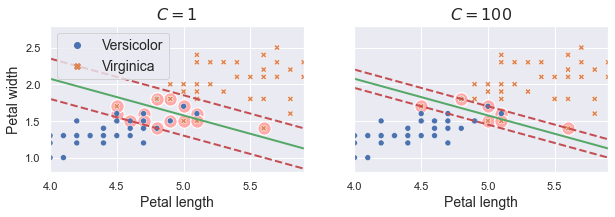

In [25]:
soft_margin([1,100])

$C$ is a tuning parameter that controls the bias-variance trade-off. [Insert a line about the bias-variance trade-off]. When $C$ is small we have narrow margins rarely violated, but highly fit to the training data (low bias-high variance). Coversely, when larger, the margin is wider amounting to less hard fitting (high bias-low variance).

Like most hyper-parameters, it is often chosen using cross-validation.

Alike to maximal margin classifiers, SVC's only rely on a few observations, those on the margin or those that violate the margin (*Support Vectors*) - if they are on the correct side of the margin they dont change the classifier. This does mean that they are robust to observations far away from the hyperplane.

## Exercises

1. If $C$ is large, will there be more or less support vectors than if $C$ is small? Explain your answer.

## Exercise Answers
1. When the tuning parameter $C$ is large, then there are __more__ support vectors, as many observations are involve in determining the hyperplane.

# Support Vector Machine
Aims to address the situation where the boundry between two classes is not linear.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

def non_linear_examples():
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 5))
    axes = axes.flatten()
    plt.sca(axes[0])
    nl1, y1 = datasets.make_classification(n_samples=300, n_features=2, 
                                          n_redundant=0, n_informative= 2, 
                                          n_classes=3, n_clusters_per_class=1, 
                                          random_state=14, class_sep=30, 
                                          hypercube=False)
    y1 = np.where(y1==1,0,y1)
    y1 = np.where(y1==2,1,y1)
    sns.scatterplot(nl1[:,0], nl1[:,1], y1, legend=False)

    plt.sca(axes[1])
    nl2, y2 = make_moons(n_samples=300, noise=0.15, random_state=42)
    sns.scatterplot(nl2[:,0], nl2[:,1], y2, legend=False)
    
    svm_clf1 = LinearSVC(random_state=42).fit(nl1, y1)
    svm_clf2 = LinearSVC(random_state=42).fit(nl2, y2)

    # Convert to unscaled parameters
    b1 = svm_clf1.intercept_[0]
    b2 = svm_clf2.intercept_[0]
    w1 = svm_clf1.coef_[0]
    w2 = svm_clf2.coef_[0]

    # Find support vectors (LinearSVC does not do this automatically)
    t1 = y1 * 2 - 1
    t2 = y2 * 2 - 1
    support_vectors_idx1 = (t1 * (nl1.dot(w1) + b1) < 1).ravel()
    support_vectors_idx2 = (t2 * (nl2.dot(w2) + b2) < 1).ravel()
    svm_clf1.support_vectors_ = nl1[support_vectors_idx1]
    svm_clf2.support_vectors_ = nl2[support_vectors_idx2]

    plt.sca(axes[2])
    plot_svc_decision_boundary(svm_clf1, -5, 4, highlight=False)
    sns.scatterplot(nl1[:,0], nl1[:,1], y1, legend=False)

    plt.sca(axes[3])
    plot_svc_decision_boundary(svm_clf2, -1.5, 2.5, highlight=False)
    sns.scatterplot(nl2[:,0], nl2[:,1], y2, legend=False)

    plt.show()

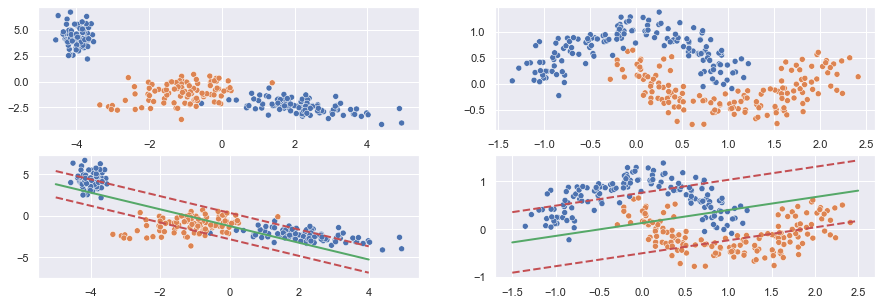

In [27]:
import warnings
# TEMP
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    non_linear_examples()

- A hyperplane does not need to be linear as the input feature space can be projected to higher dimensions using a kernel (e.g. radial basis kernel<sup>2,3</sup>), allowing a hyperplane to be fitted to split the data into classes. The data can then be mapped back into the original feature space to create a nonlinear separation boundary.

---
2. Cover, T. M. (1965). Geometrical and statistical properties of systems of linear inequalities with applications in pattern recognition. IEEE transactions on electronic computers, (3), 326-334.
3. Varsavsky, A., Mareels, I., & Cook, M. (2016). Epileptic seizures and the EEG: measurement, models, detection and prediction. CRC Press.

We could consider enlarging the feature space using quadratic, cubic or higher-order polynomial functions, however the larger the number of features, the higher computational burden. Instead it is common to enlarge the feature space using an extension of a SVC termed a Support Vector Machine, which uses _kernels_.

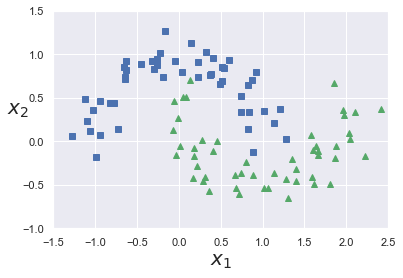

In [28]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [29]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_feat = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='poly', degree=3, C=10, random_state=42))
    ])

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("Polynomial Feature Engineering")
    %timeit polynomial_feat.fit(X, y)
    print("Polynomial Kernel")
    %timeit polynomial_svm.fit(X, y)

Polynomial Feature Engineering
1.35 ms ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Polynomial Kernel
1.11 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


...although in this case (with these specific hyperparameters) the feature engineering performs better. SVM can be sensitive to hyperparameter settings so we need to normally cross-validate these!

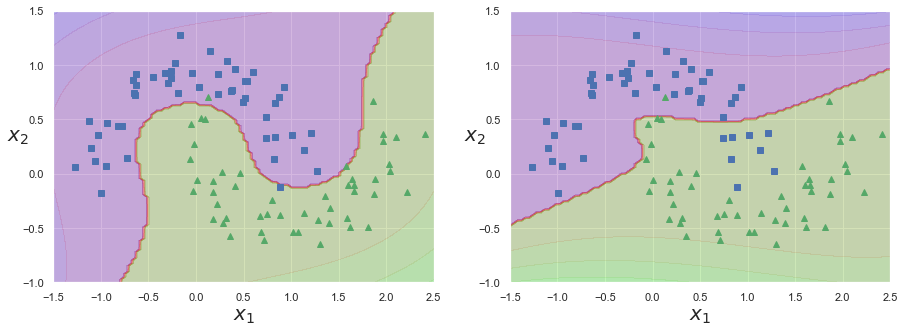

In [31]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plt.sca(axes[0])
plot_predictions(polynomial_feat, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.sca(axes[1])
plot_predictions(polynomial_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

The kernel apporach is an efficient computational approach to enlarge our feature space to accommodate a non-linear boundary.

Skipping over some technical details (see __REF__), it turns out we can use the inner products of two observations rather than using the observations themselves:

$<x_i,x_{i^{\prime}}> = \sum^P_{j=1}x_{ij}x_{i^{\prime}j}$.

Using this we can represent the linear support vector classifier as: 

$f(x) = \beta_0 + \sum^n_{i=1}\alpha_i<x,x_i>$.

In the above case, for estimating the parameters $\alpha_1...,\alpha_n$ and $\beta_0$, we need the $n(n-1)/2$ inner products $<x,x_i>$ between all pairs of training observations. Similarly, if wanted to compute $f(x)$ we would need to the inner product between $x$ and each training point $x_i$.

However, $\alpha$ is nonzero only for support vectors, so if we have a collection of indicies of these support points we can do the following instead:

$f(x) = \beta_0 + \sum_{i\in S}\alpha_i<x,x_i>$.

Also instead of actually calculating the inner product, we could instead use a _generalisation_, $K(x,x_{i^{\prime}})$, where $K$ is a _kernel_. We can now define the classifier as:

$f(x) = \beta_0 + \sum_{i\in S}\alpha_iK(x,x_i)$.

A kernel is a function that quantifies the similarity of two observations. For example, for a _linear kernel_ we could use:

$K(x_i, x_{i'}) = \sum^P_{j=1}x_{ij}x_{i'j}$,

where we quantifiy the similarity of pairs of observations using Pearson (standard) correlation.

However, we could use other forms of kernel to fit the support vector classifier in a higher-dimensional space, such as a _polynomial kernel_:

$K(x_i, x_{i'}) = (1+\sum^P_{j=1}x_{ij}x_{i'j})^d$,

where d is a positive integer.

__[MORE INFO ON polynomial kernels]__

In [32]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def poly_info():
    X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
    X2D = np.c_[X1D, X1D**2]
    y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

    plt.figure(figsize=(10, 3))

    plt.subplot(121)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
    plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.axis([-4.5, 4.5, -0.2, 0.2])

    plt.subplot(122)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
    plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
    plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
    plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
    plt.axis([-4.5, 4.5, -1, 17])

    plt.subplots_adjust(right=1)

    plt.show()

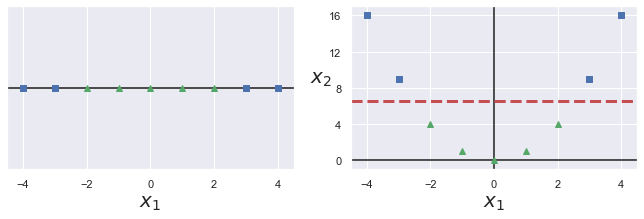

In [33]:
poly_info()

Another popular choice is the _radial kernel_:

$K(x_i, x_{i'}) = exp(-\gamma\sum^P_{j=1}(x_{ij}-x_{i'j})^2)$,

where $\gamma$ is a positive integer.

In [34]:
def non_linear_examples():
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 5))
    axes = axes.flatten()
    plt.sca(axes[0])
    nl1, y1 = datasets.make_classification(n_samples=300, n_features=2, 
                                          n_redundant=0, n_informative= 2, 
                                          n_classes=3, n_clusters_per_class=1, 
                                          random_state=14, class_sep=30, 
                                          hypercube=False)
    y1 = np.where(y1==1,0,y1)
    y1 = np.where(y1==2,1,y1)
    sns.scatterplot(nl1[:,0], nl1[:,1], y1, legend=False)

    plt.sca(axes[1])
    nl2, y2 = make_moons(n_samples=300, noise=0.15, random_state=42)
    sns.scatterplot(nl2[:,0], nl2[:,1], y2, legend=False)
    
    svm_clf1 = SVC(random_state=42).fit(nl1, y1)
    svm_clf2 = SVC(random_state=42).fit(nl2, y2)

    plt.sca(axes[2])
    plot_predictions(svm_clf1, [-5, 5, -5, 7.5])
    sns.scatterplot(nl1[:,0], nl1[:,1], y1, legend=False)

    plt.sca(axes[3])
    plot_predictions(svm_clf2, [-1.5, 2.5, -1, 1.5])
    sns.scatterplot(nl2[:,0], nl2[:,1], y2, legend=False)
    plt.suptitle('Radial Basis Kernel')

    plt.show()

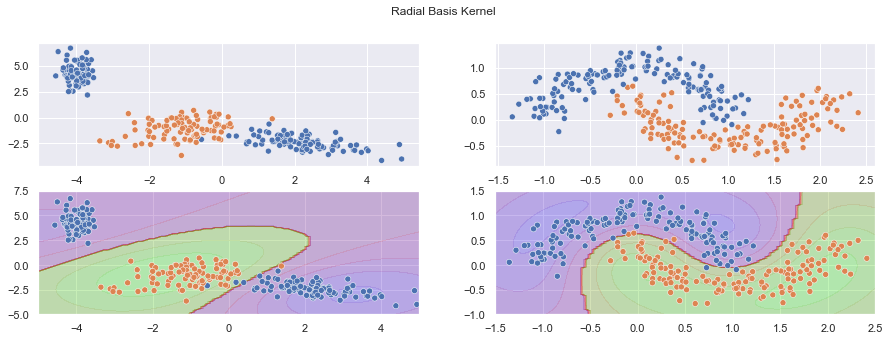

In [35]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    non_linear_examples()

When using a SVM model trained using a RBF kernel classifies a test observation $x^* = (x^*_1...x^*_p)T$, only training observaations close to $x^*$ (in terms of Euclidean distance) will play a role in its class label. This is because $(x^*_j-x_{ij})^2$ will be large, so $exp(-\gamma\sum^P_{j=1}(x^*_j-x_{ij})^2)$ will be small.

__[MORE INFO ON RBF kernels]__

In [38]:
# copied from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def gaussian_rbf(x, landmark, gamma):
        return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

def rbk_info():

    gamma = 0.3
    X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
    X2D = np.c_[X1D, X1D**2]
    y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

    x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
    x2s = gaussian_rbf(x1s, -2, gamma)
    x3s = gaussian_rbf(x1s, 1, gamma)

    XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
    yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

    plt.figure(figsize=(10.5, 4))

    plt.subplot(121)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
    plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
    plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
    plt.plot(x1s, x2s, "g--")
    plt.plot(x1s, x3s, "b:")
    plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"Similarity", fontsize=14)
    plt.annotate(r'$\mathbf{x}$',
                 xy=(X1D[3, 0], 0),
                 xytext=(-0.5, 0.20),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 fontsize=18,
                )
    plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
    plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
    plt.axis([-4.5, 4.5, -0.1, 1.1])

    plt.subplot(122)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
    plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
    plt.xlabel(r"$x_2$", fontsize=20)
    plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
    plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
                 xy=(XK[3, 0], XK[3, 1]),
                 xytext=(0.65, 0.50),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 fontsize=18,
                )
    plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
    plt.axis([-0.1, 1.1, -0.1, 1.1])

    plt.subplots_adjust(right=1)

    plt.show()

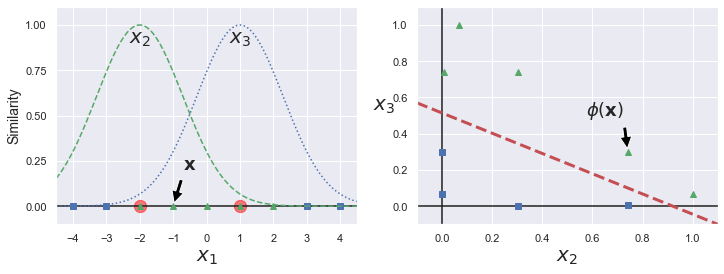

In [39]:
rbk_info()

__[MORE INFO ON HOW C AND GAMMA INTERACT]__

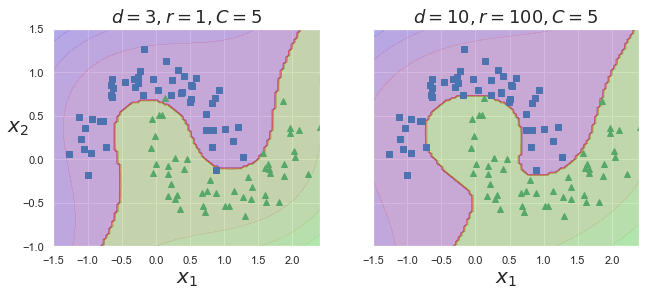

In [40]:
from sklearn.svm import SVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


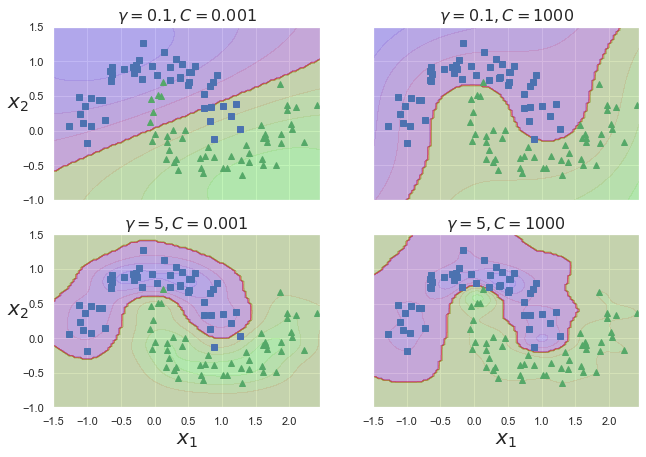

In [42]:
gamma = 0.3
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]


x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))
    
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# Implimentation
The Iris dataset is useful for demonstrating SVM's, but are a bit "too small to be representative of real world machine learning tasks"<sup>web2</sup>. Also with SVM's we'll probably do well no matter how our hyperparamters are set. So lets demonstrate its use on a more (still manageable) realisitic dataset.

Name|		Data Type|	Meas.|	Description
----|		---------|	-----|	-----------
Sex	|	nominal		|	|    M, F, and I (infant)|
Length|		continuous|	mm|	Longest shell measurement|
	Diameter|	continuous|	mm|	perpendicular to length|
	Height|		continuous|	mm|	with meat in shell|
	Whole weight|	continuous|	grams|	whole abalone|
	Shucked weight|	continuous|	grams|	weight of meat|
	Viscera weight|	continuous|	grams|	gut weight (after bleeding)|
	Shell weight|	continuous|	grams|	after being dried|
	Rings|		integer|			|+1.5 gives the age in years|

In [43]:
names = ["Sex", "Length", "Diameter", "Height", "Whole weight", 
         "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

df = pd.read_csv("abalone_data.csv", names=names)
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

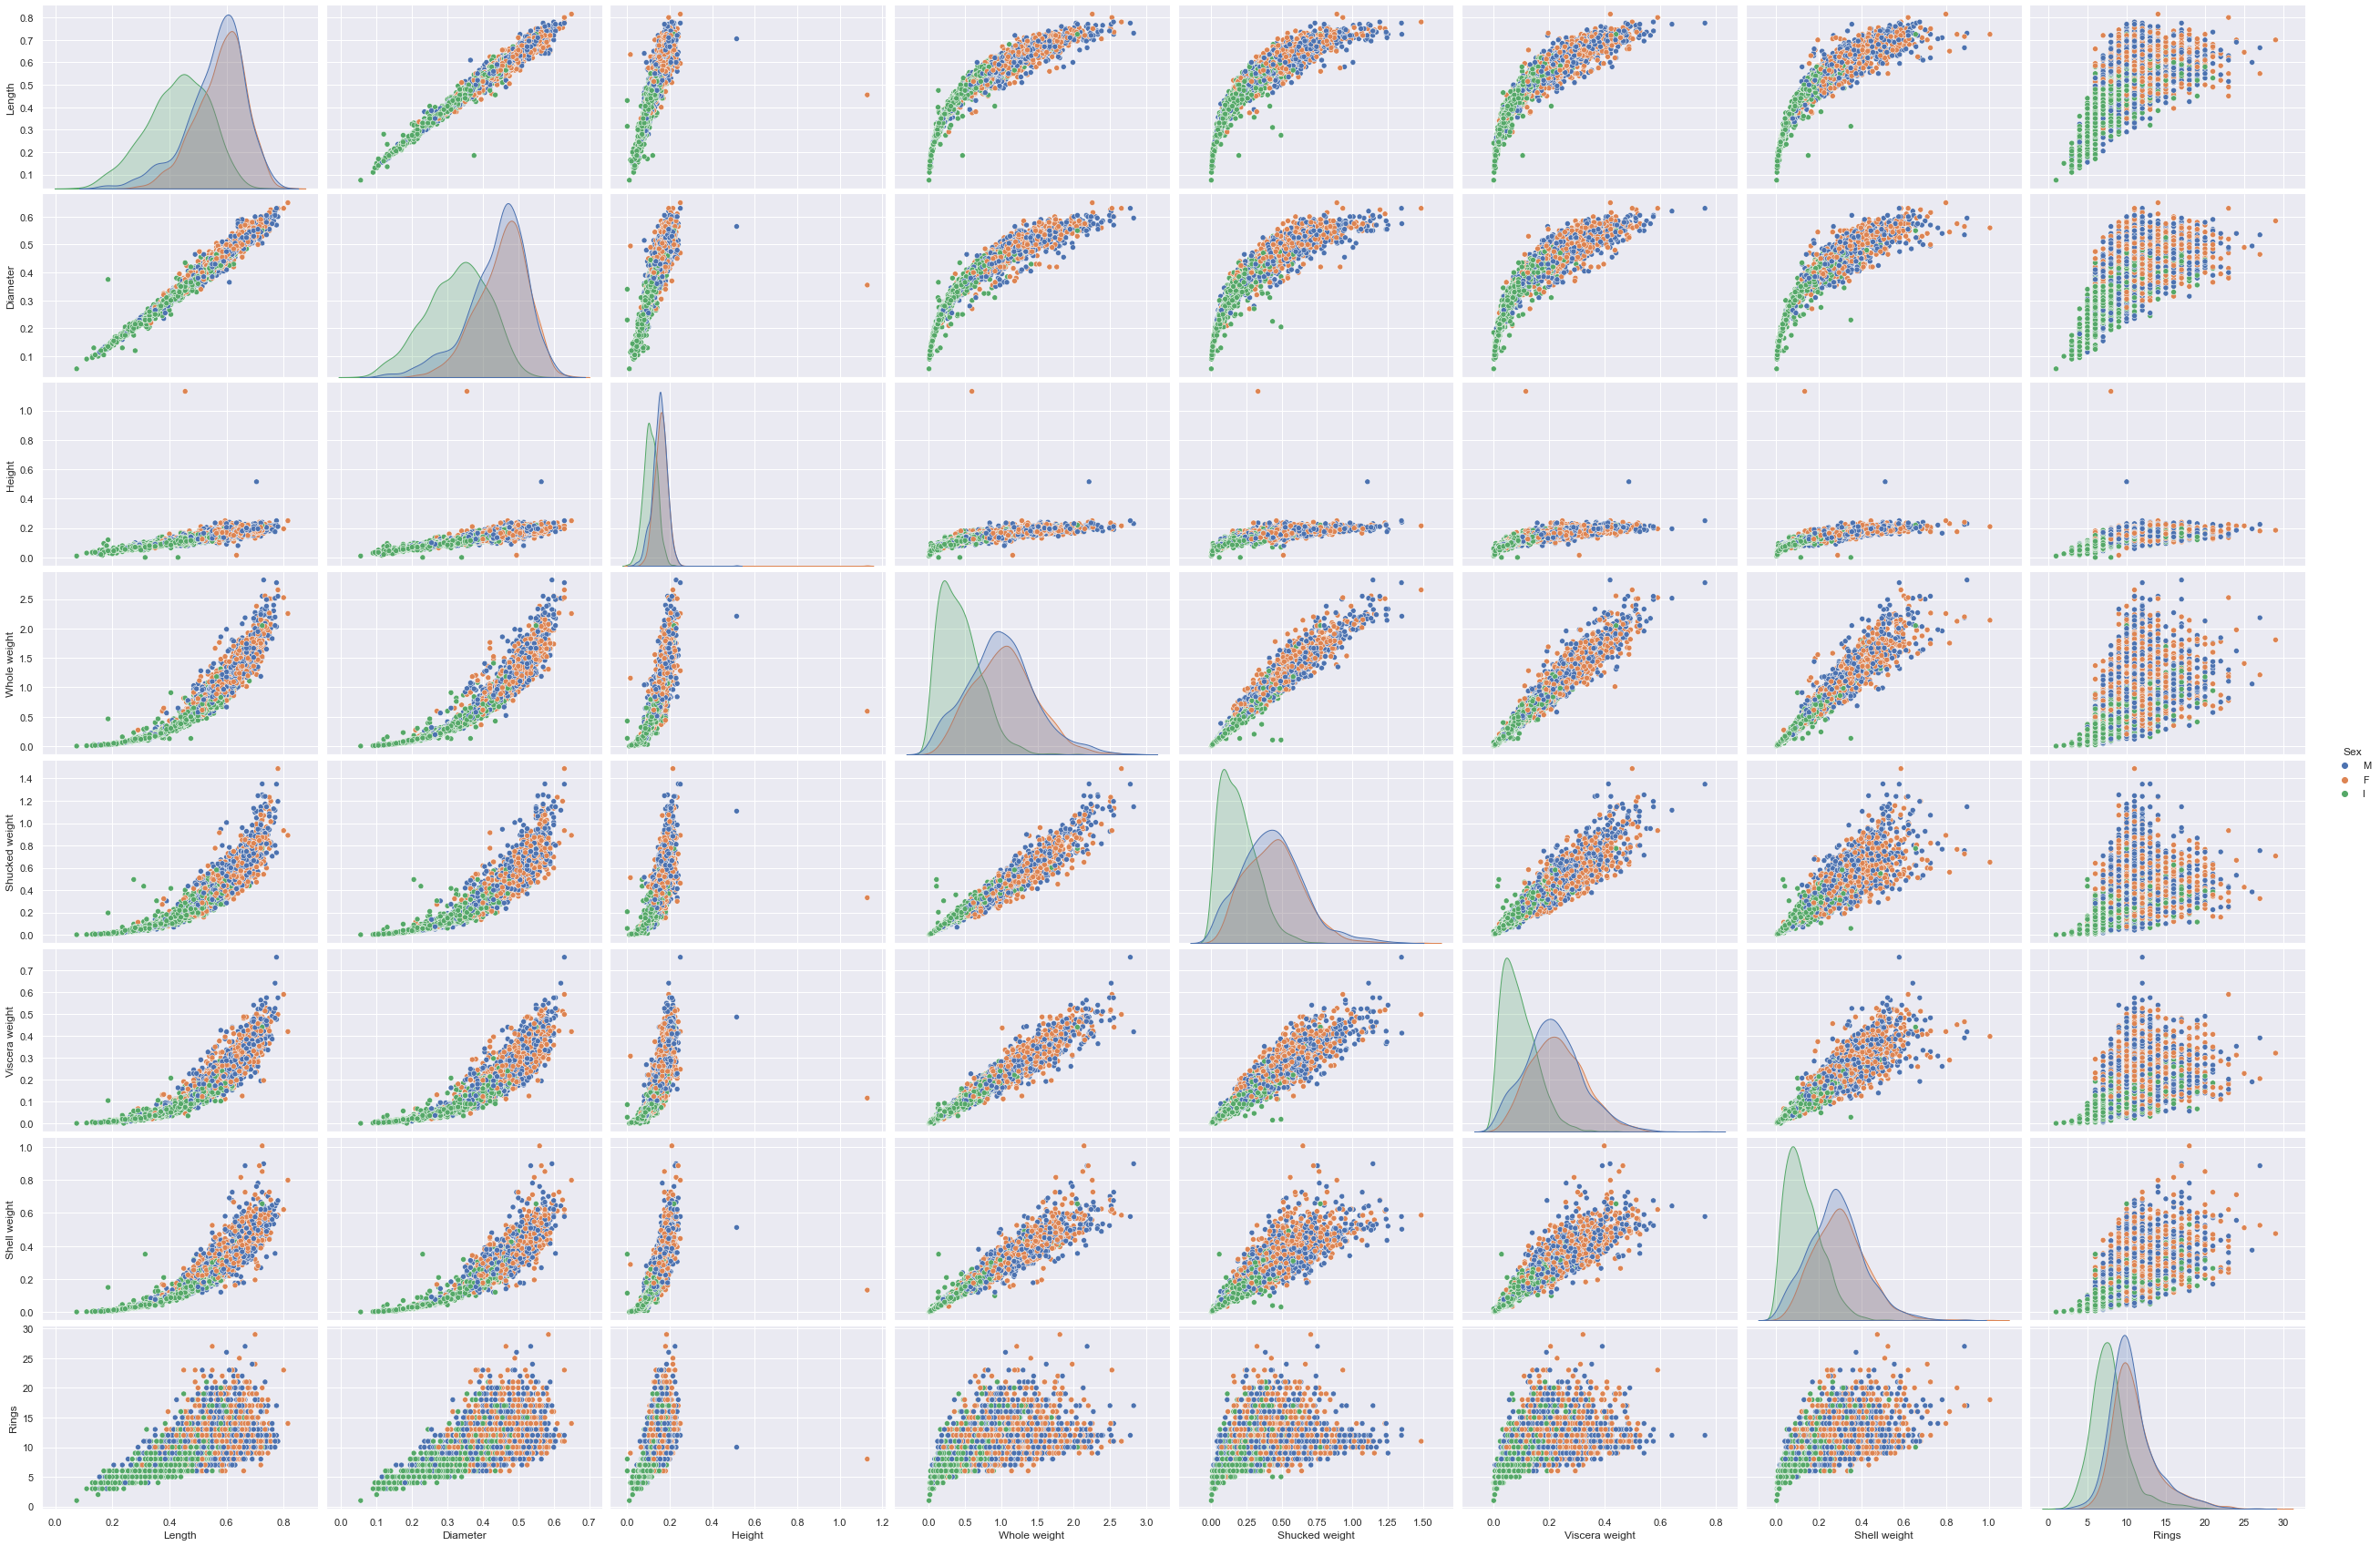

In [44]:
sns.pairplot(df, hue="Sex", height=3, aspect = 1.5)
plt.show()

In [45]:
y_labels = df["Sex"]
X = df.drop("Sex", axis=1)

# create a dictionary with the our int labels
labels_multi = dict(zip(y_labels.unique(), range(3)))

# make a binary version - infants vs. adults
labels_bin = labels_multi.copy()
labels_bin['F'] = 0; labels_bin['I'] = 1

# replace the labels so they are now binary
y_bin = y_labels.replace(labels_bin)

There are three classes for SVM classification in Scikit-Learn<sup>Geron</sup>:

| Class                | Time Complexity                                                                      | Out-of-core Support | Kernel Trick|
|------------------------|-------------------------------------------------------------------------------------------|---------------------------------|--------------------|
| LinearSVC       | 0(*m* x *n*)                                                                               | No                               | No                |
| SGDClassifier | 0(*m* x *n*)                                                                               | Yes                              | No                |
| SVC                  | 0(*m*<sup>2</sup> x *n*) to 0(*m*<sup>3</sup> x *n*) | No                               | Yes               |

First lets make a pipeline with two steps:

1. Standardize the features
2. LinearSVC / SVC

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X.values, y_bin.values, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

linear_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(random_state=42))
    ])

rbf_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(random_state=42))])

linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

print("linear_svm")
display(pd.DataFrame(classification_report(y_val, linear_svm.predict(X_val), output_dict=True)))

print("rbf_svm")
display(pd.DataFrame(classification_report(y_val, rbf_svm.predict(X_val), output_dict=True)))

linear_svm


0           1  accuracy   macro avg  weighted avg
precision    0.892938    0.665217  0.814649    0.779078      0.824860
recall       0.835821    0.765000  0.814649    0.800410      0.814649
f1-score     0.863436    0.711628  0.814649    0.787532      0.818053
support    469.000000  200.000000  0.814649  669.000000    669.000000

rbf_svm


0           1  accuracy   macro avg  weighted avg
precision    0.884120    0.719212  0.834081    0.801666      0.834820
recall       0.878465    0.730000  0.834081    0.804232      0.834081
f1-score     0.881283    0.724566  0.834081    0.802925      0.834432
support    469.000000  200.000000  0.834081  669.000000    669.000000

So that was quite simple, but we are only using the default hyperparamters which is not good. Lets look at finding some better hyperparameters.

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import uniform
from time import time

# specify parameters and distributions to sample from
param_dist = {'svm_clf__class_weight': [None, "balanced"],
              'svm_clf__C':list(range(1,50))}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(linear_svm, param_distributions=param_dist,
                                   n_iter=n_iter_search, random_state=42)
start = time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates" % ((time() - start), n_iter_search))
pd.DataFrame(random_search.cv_results_).sort_values("rank_test_score")[["param_svm_clf__class_weight", "param_svm_clf__C", "mean_test_score", "std_test_score"]].head()

RandomizedSearchCV took 6.18 seconds for 20 candidates


param_svm_clf__class_weight param_svm_clf__C  mean_test_score  \
14                        None               23         0.823733   
17                        None                7         0.822235   
9                         None                1         0.821860   
15                        None                3         0.821860   
1                         None               21         0.821857   

    std_test_score  
14        0.011409  
17        0.013053  
9         0.012871  
15        0.012871  
1         0.011044

In [48]:
# specify parameters and distributions to sample from
param_dist = {'svm_clf__class_weight': [None, "balanced"],
              'svm_clf__C':list(range(1,50)),
              'svm_clf__gamma':uniform(0,1)}

# run randomized search
n_iter_search = 20
random_search_rbf = RandomizedSearchCV(rbf_svm, param_distributions=param_dist,
                                   n_iter=n_iter_search, random_state=42)
start = time()
random_search_rbf.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates" % ((time() - start), n_iter_search))
pd.DataFrame(random_search_rbf.cv_results_).sort_values("rank_test_score")[["param_svm_clf__class_weight", "param_svm_clf__C", "mean_test_score", "std_test_score"]].head()

RandomizedSearchCV took 20.01 seconds for 20 candidates


param_svm_clf__class_weight param_svm_clf__C  mean_test_score  \
14                        None               21         0.832334   
13                        None                3         0.828966   
7                         None               21         0.828593   
15                        None                4         0.828219   
11                        None               16         0.827469   

    std_test_score  
14        0.011647  
13        0.010244  
7         0.005631  
15        0.007217  
11        0.005509

Just from above we have improved our RBF scores, although no linear SVM much.

In [49]:
print("linear_svm")
display(pd.DataFrame(classification_report(y_val, random_search.best_estimator_.predict(X_val), output_dict=True)))

print("rbf_svm")
display(pd.DataFrame(classification_report(y_val, random_search_rbf.best_estimator_.predict(X_val), output_dict=True)))

linear_svm


0           1  accuracy   macro avg  weighted avg
precision    0.897912    0.655462  0.811659    0.776687      0.825431
recall       0.825160    0.780000  0.811659    0.802580      0.811659
f1-score     0.860000    0.712329  0.811659    0.786164      0.815853
support    469.000000  200.000000  0.811659  669.000000    669.000000

rbf_svm


0           1  accuracy   macro avg  weighted avg
precision    0.881607    0.734694  0.838565    0.808150      0.837687
recall       0.889126    0.720000  0.838565    0.804563      0.838565
f1-score     0.885350    0.727273  0.838565    0.806312      0.838092
support    469.000000  200.000000  0.838565  669.000000    669.000000

## Dimensionality Reduction
In order to reduce a models complexity, run time, and potential for overfitting to the training data, dimension reduction techniques can be used. Broadly they can be grouped into methods that create a subset of the original set of features (Feature Selection) and methods that create new synthetic features through combining the original features and discarding less important ones (Feature Extraction). Essentially we want to remove "uninformative infromation" and retain useful bits<sup>Zheng</sup>. If you have too many features, it may be that some of them are highly correlated and therefore redundant. Therefore we can either select just some of them, or compress them onto a lower dimensional subspace<sup>Raschka</sup>.

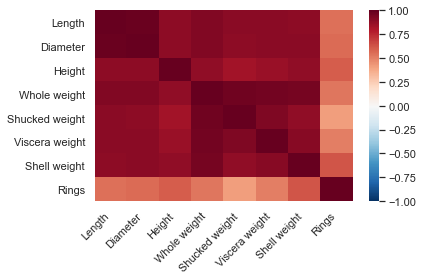

In [50]:
train_df = pd.DataFrame(X_train, columns=names[1:])
correlations = train_df.corr()
# plot correlation matrix
sns.heatmap(correlations, 
            vmin=-1, 
            vmax=1,
            xticklabels=correlations.columns.values,
            yticklabels=correlations.columns.values,
            cmap="RdBu_r"
           )
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## Filtering

A computationally efficient method of selecting features is to use a filter method. Filter methods aim to remove features with a low potential to predict outputs; usually though univariate analysis before classification. A filter could be a threshold set on each features variance, or the correlation or mutual information between each feature and the response variable. Although filters are computationally efficient comparative to other feature selection methods, they are independent of the model chosen so should be used conservatively to ensure data is not removed that a model may find useful<sup>1</sup>.

### Variance Threshold

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

In [51]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress
from collections import defaultdict
import pprint
pp = pprint.PrettyPrinter()


X_train_ = StandardScaler().fit_transform(X_train)
sel = VarianceThreshold(threshold=.99)
sel.fit(X_train_)

# get boolian list of what is kept and what not
keep_bool = sel.get_support()
# get index of false values
remove_index = [i for i, x in enumerate(keep_bool) if not x]

# merge multiindex feature labels into 1 label list
feat_labels = train_df.columns
remove_list = list(feat_labels[remove_index])

print(color.BOLD+color.UNDERLINE+'Features and Channels Removed ('+str(len(remove_index))+')\n'+color.END)
pp.pprint(remove_list)

Features and Channels Removed (0)

[]


### Mutual Information Classification

Mutual information estimation measures the dependency between two variables by estimating the entropy from k-nearest neighbors distances. If two random variables are independent this equals 0, with higher dependency producing larger numbers<sup>1</sup>. 

For Feature Selection a threshold can be set based on the number of features you want to keep or a value theshold.

---

1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

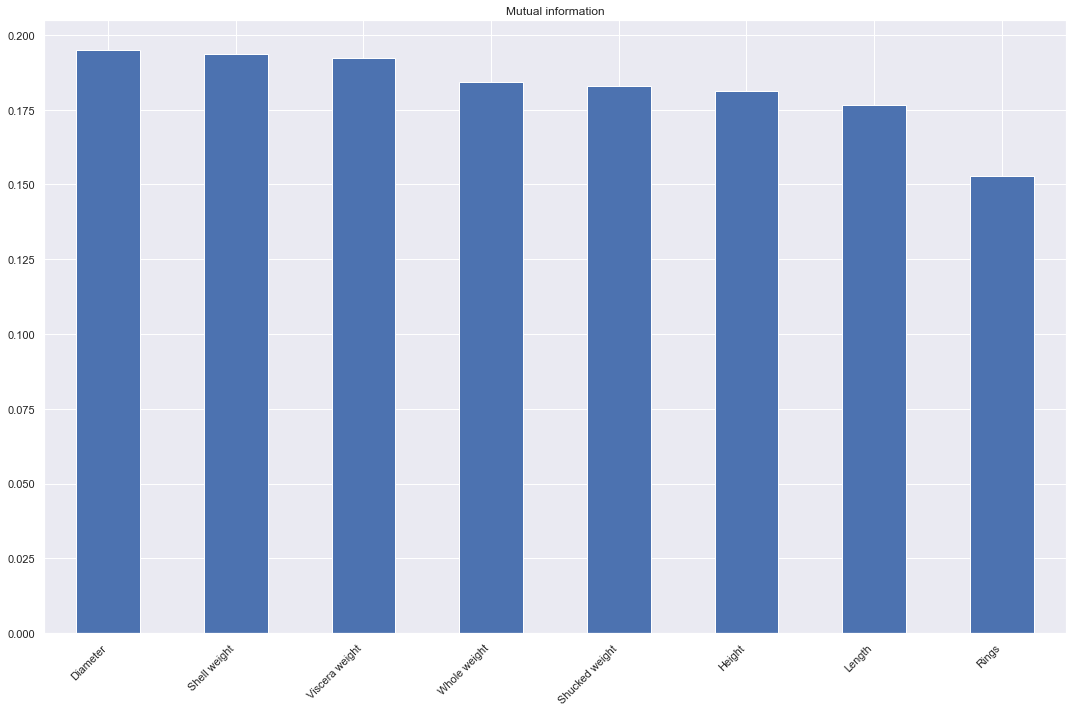

In [52]:
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(15,10))

X_train_ = StandardScaler().fit_transform(X_train)
mi = mutual_info_classif(X_train_, y_train)
mi_series = pd.Series(mi, index=feat_labels).sort_values(ascending = False)

mi_series.plot.bar(legend = False, figsize=(15,10))
plt.title('Mutual information')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## Embedded Methods

Instead of being independent, feature selection methods can be embedded in the model training process. An example would be the l1 regularizer for linear models, which imposes a sparsity constraint on the model to ensure a model favours fewer features. These methods are efficient and specific to the chosen model, but are not as powerful at wrapper methods (discussed next)<sup>1</sup>.

Below is just an example of how you could implement it in a pipeline using a Support Vector Machine.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

## Wrapper Methods
Wrapper methods are also  specific to the chosen model as they directly optimise the accuracy of a classifier by trying subsets of features. This enables keeping features that are useful in combination with others, even if uninformative in isolation<sup>1</sup>. Wrapper methods are the most computationally expensive, especially when used with nonlinear classifiers.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

### Exhaustive Feature Selector

Wrapper feature selectors can be exhaustive by sampling all possible feature combinations and finding the combination that provides the greatest classifier performance. However these models might overfit to the training data and not be logical.

Lets first create a smaller dataset to demonstrate this on by only using a random subset of the features.

In [53]:
%%time
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('svm_clf', SVC(kernel='rbf', 
                                     random_state=42))])

pipe_svc.set_params(**random_search_rbf.best_params_)

efs = ExhaustiveFeatureSelector(pipe_svc, 
                                min_features=1, 
                                max_features=X_train.shape[1], 
                                print_progress=False, 
                                scoring='accuracy',
                                cv=StratifiedKFold(), 
                                n_jobs=-1,
                                clone_estimator=True)

efs.fit(X_train, y_train, custom_feature_names=names[1:])
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)

print(color.BOLD+color.UNDERLINE+"Best Found Feature Combination"+color.END)
display(df['feature_names'].iloc[0])
display(df.head())

Best Found Feature Combination


('Length', 'Whole weight', 'Shucked weight', 'Shell weight', 'Rings')

feature_idx                                          cv_scores  \
194     (0, 3, 4, 6, 7)  [0.8392523364485981, 0.8205607476635514, 0.827...   
230  (0, 1, 3, 4, 6, 7)  [0.8392523364485981, 0.8205607476635514, 0.827...   
174     (0, 1, 3, 4, 7)  [0.8392523364485981, 0.8186915887850468, 0.827...   
119        (0, 3, 4, 7)  [0.8429906542056075, 0.8130841121495327, 0.823...   
235  (0, 2, 3, 4, 6, 7)  [0.8392523364485981, 0.8186915887850468, 0.829...   

    avg_score                                      feature_names  ci_bound  \
194  0.835333  (Length, Whole weight, Shucked weight, Shell w...  0.014514   
230  0.834959  (Length, Diameter, Whole weight, Shucked weigh...  0.013732   
174  0.834585  (Length, Diameter, Whole weight, Shucked weigh...  0.015180   
119  0.833837      (Length, Whole weight, Shucked weight, Rings)  0.018335   
235  0.833087  (Length, Height, Whole weight, Shucked weight,...  0.012036   

      std_dev   std_err  
194  0.011292  0.005646  
230  0.010684  0.005342  
174  0.011811  0.005905  
119  0.014266  0.007133  
235  0.009365  0.004682

Wall time: 1min 19s


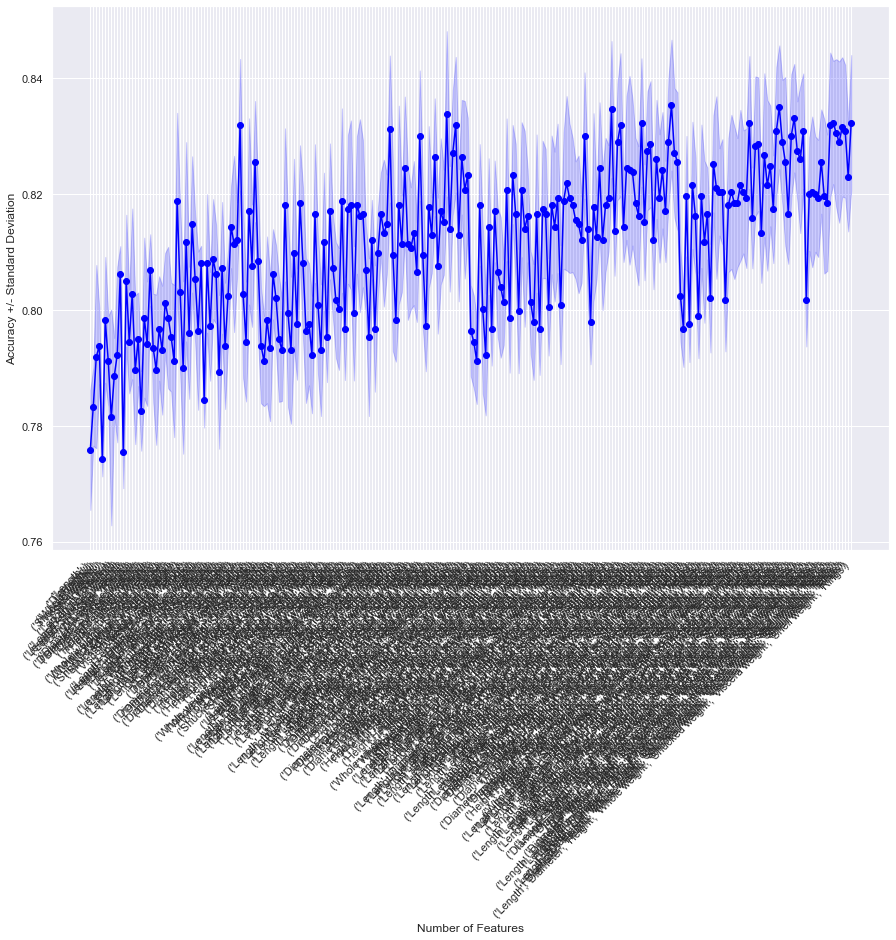

In [54]:
metric_dict = efs.get_metric_dict()

fig = plt.figure(figsize=(15,10))
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=45, ha='right')
plt.show()

### Sequential Feature Selector

Alternatively you can select features sequentially by removing or adding features until a subset of the desired size is reached. This is a suboptimal solution but is computationally less expensive<sup>1</sup>

As can be seen we can find a model with 4 features from our full data in a short time relative to the previous model.

---

1. http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [58]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs = SequentialFeatureSelector(pipe_svc,
                                k_features=4, 
                                forward=True, 
                                floating=False, 
                                #verbose=2,
                                scoring='accuracy',
                                cv=StratifiedKFold(),
                                n_jobs=-1)

sfs.fit(X_train, y_train, custom_feature_names=names[1:])

display(pd.DataFrame.from_dict(sfs.get_metric_dict()).T)

feature_idx                                          cv_scores avg_score  \
1          (5,)  [0.8093457943925234, 0.7850467289719626, 0.790...  0.798279   
2        (5, 7)  [0.8205607476635514, 0.7962616822429907, 0.808...  0.814750   
3     (0, 5, 7)  [0.8373831775700935, 0.8205607476635514, 0.816...  0.825596   
4  (0, 3, 5, 7)  [0.8429906542056075, 0.8168224299065421, 0.818...  0.827094   

                                   feature_names  ci_bound   std_dev   std_err  
1                              (Viscera weight,)  0.013950  0.010854  0.005427  
2                        (Viscera weight, Rings)  0.015110  0.011756  0.005878  
3                (Length, Viscera weight, Rings)  0.013438  0.010455  0.005227  
4  (Length, Whole weight, Viscera weight, Rings)  0.013861  0.010784  0.005392

Wall time: 5.55 s


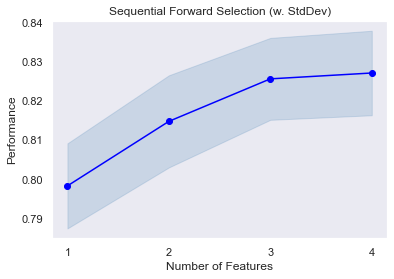

In [59]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Model Stacking
A method growing in popularity is to use model stacking, where the input to one model is the output of another. This allows for nonlinearities to be captured in the first model, and the potential to use a simple linear model as the last layer. Deep learning is an example of model stacking as, often neural networks are layered on top of one another, to optimize both the features and the classifier simultaneously<sup>1</sup>.

An example of model stacking is to use the output of a decision tree–type model as input to a linear classifier. We can gain the importance for each feature by getting the average impurity decrease computed from all decision trees in the forest without regarding the linear separability of the classes. However, if features are highly correlated, one feature may be ranked highly while the information of the others not being fully captured<sup>1</sup>. 

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
2. Birjandtalab, J., Pouyan, M. B., Cogan, D., Nourani, M., & Harvey, J. (2017). Automated seizure detection using limited-channel EEG and non-linear dimension reduction. Computers in biology and medicine, 82, 49-58.
3.  Truong, N. D., Kuhlmann, L., Bonyadi, M. R., Yang, J., Faulks, A., & Kavehei, O. (2017). Supervised learning in automatic channel selection for epileptic seizure detection. Expert Systems with Applications, 86, 199–207. https://doi.org/10.1016/j.eswa.2017.05.055

## Imballanced Data

In [60]:
from collections import Counter

print(Counter(y_train))

Counter({0: 1797, 1: 875})


## Multi-Class
__TODO__
- change the data to the bigger data instead of the Iris

Some models (e.g. tree-based classifiers) are inherently multiclass, whereas other machine learning algorithms are able to be extended to multi-class classification using techniques such as the One-versus-Rest or One-versus-One methods<sup>Géron</sup>.

### One-verses-all (or One-vs-the-rest) 

The _One-verses-all_ approach is were you train a classifier for each class and select the class from the classifier that outputs the highest score<sup>Géron</sup>. In other terms, if we fit $K$ SVMs, we assign a test observation ($x^*$) to the class for which $\beta_{0k} + \beta_{1k}x^*_1, ...,\beta_{pk}x^*_p$ is largest (the most confident)<sup>James</sup>. 

As each class is fitted against all other classes for each classifier, it is relatively interpretable<sup>web1</sup>.

In [61]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

rbf = SVC(C=100, kernel='rbf', random_state=42)

multi_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsRestClassifier(rbf))])

display(cross_val_score(multi_rbf, iris_df, target, cv=3))

array([0.96, 0.92, 0.94])

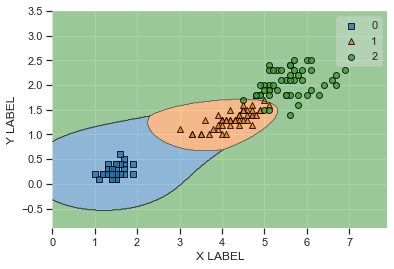

In [62]:
from mlxtend.plotting import plot_decision_regions
multi_rbf.fit(iris_df[["petal length (cm)", "petal width (cm)"]], target)

plot_decision_regions(iris_df[["petal length (cm)", "petal width (cm)"]].values,
                      target.values,
                      clf = multi_rbf)

plt.xlabel("X LABEL") 
plt.ylabel("Y LABEL")
#plt.xlim(0,.6)
#plt.ylim(0,1.)
plt.show()

### OneVsOneClassifer

Another strategy is to use a _OneVsOne_ approach. This trains $N \times (N-1) / 2$ classifiers by comparing each class against each other so when a prediction is made, the class that is selected the most is chosen<sup>Géron</sup> (we'll get more onto *Bagging* next week). It is useful where algorithms do not scale well with data size (such as SVM) because each training and prediction is only needed to be run on a small subset of the data for each classifer<sup>Géron,web1</sup>.

In [63]:
from sklearn.multiclass import OneVsOneClassifier

multi_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsOneClassifier(rbf))])

display(cross_val_score(multi_rbf, iris_df, target, cv=3))

array([0.94, 0.92, 0.96])

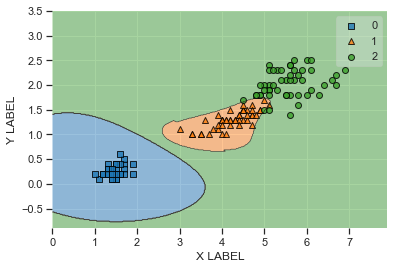

In [64]:
from mlxtend.plotting import plot_decision_regions
multi_rbf.fit(iris_df[["petal length (cm)", "petal width (cm)"]], target)

plot_decision_regions(iris_df[["petal length (cm)", "petal width (cm)"]].values,
                      target.values,
                      clf = multi_rbf)

plt.xlabel("X LABEL") 
plt.ylabel("Y LABEL")
#plt.xlim(0,.6)
#plt.ylim(0,1.)
plt.show()

## Majority Voting

A group of classifiers don't have to all be SVM's. Indeed Scikitlearn has a VotingClassifier where multipule classification pipelines can be combined to create an even better classifier that aggregates predictions. This aggregation can be done by simply selecting the class label that has been predicted by the majority of the classifiers (more than 50% of votes) for 'hard voting'. Majority vote refers to binary class decisions but can be generalized to a multi-class setting using 'plurality voting'. Particular classifiers return the probability of a predicted class label via the predict_proba method and this can be used for 'soft voting' instead of class labels<sup>1</sup>.

---
This aggregation can be done by simply selecting the class label that has been predicted by the majority of the classifiers (more than 50% of votes) for 'hard voting'. Majority vote refers to binary class decisions but can be generalized to a multi-class setting using 'plurality voting'. 

Particular classifiers return the probability of a predicted class label via the `predict_proba` method and this can be used for 'soft voting' instead of class labels<sup>1</sup>. Soft voting often achives a higher performance than hard voting because highly confident votes are given more weight<sup>2</sup>.

---
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

---
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [ ]:
# TODO: Replace the Tree with one of the other classifiers they have already learnt

#%%time
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import VotingClassifier
#from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import cross_val_score
#from imblearn.under_sampling import NeighbourhoodCleaningRule
#from sklearn.decomposition import PCA
#import timeit
#from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, make_scorer
#
#clf1 = Pipeline([('scl', StandardScaler()),
#                 ('clf', SVC(kernel='rbf', 
#                             gamma='auto',
#                             random_state=RANDOM_STATE, 
#                             probability = True))])

#clf2 = Pipeline([('scl', StandardScaler()),
#                 ('clf', LogisticRegression(solver='liblinear',
#                                            random_state=RANDOM_STATE))
#])

#clf3 = DecisionTreeClassifier(random_state=RANDOM_STATE)
#
#clf_labels = ['SVM', # Support Vector Machine
#              'LR', # LogisticRegression
#              'DT'] # Decision Tree
#
# Majority Rule Voting
#hard_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
#                                           (clf_labels[1],clf2),
#                                           (clf_labels[2],clf3)],
#                              voting='hard')
#
#soft_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
#                                           (clf_labels[1],clf2),
#                                           (clf_labels[2],clf3)],
#                               voting='soft')
#
#clf_labels += ['Hard Majority Voting', 'Soft Majority Voting']
#all_clf = [clf1, clf2, clf3, hard_mv_clf, soft_mv_clf]
#
#print(color.BOLD+color.UNDERLINE+'Validation Scores\n'+color.END)
#for clf, label in zip(all_clf, clf_labels):
#    start = timeit.default_timer() # TIME STUFF
#    
#    clf.fit(X_train, y_train)
#
#    y_pred = clf.predict(X_val)
#    scores = f1_score(y_val, y_pred)
#    print(color.BOLD+label+color.END)
#    print("Score: %0.3f"
#          % scores)
    # TIME STUFF
#    stop = timeit.default_timer()
#    print("Run time:", np.round((stop-start)/60,2),"minutes")
#    print()

In [ ]:
#%%time
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#
# remove the hard voting because doesnt have predict proba
#del clf_labels[3], all_clf[3]
#
#colors = ['black', 'orange', 'blue', 'green']
#linestyles = [':', '--', '-.', '-']
#for clf, label, clr, ls \
#        in zip(all_clf,
#               clf_labels, colors, linestyles):
#
    # assuming the label of the positive class is 1
#    y_pred = clf.fit(X_train, 
#                          y_train).predict_proba(X_test)[:, 1]
#    fpr, tpr, thresholds = roc_curve(y_true=y_test,
#                                     y_score=y_pred)
#    roc_auc = auc(x=fpr, y=tpr)
#    plt.plot(fpr, tpr,
#             color=clr,
#             linestyle=ls,
#             label='%s (auc = %0.2f)' % (label, roc_auc))
#
#plt.legend(loc='lower right')
#plt.plot([0, 1], [0, 1],
#         linestyle='--',
#        color='gray',
#         linewidth=2)

#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
#plt.grid(alpha=0.5)
#plt.xlabel('False positive rate (FPR)')
#plt.ylabel('True positive rate (TPR)')

#plt.savefig(os.path.join(IMAGE_DIR, 'Pipeline_Rocs.png'), dpi=300)
#plt.show()

# References
1. Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), 179-188.
2. James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.
3. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
4. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".
5. Raschka, 2016

web1.  https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
web2. https://scikit-learn.org/stable/datasets/toy_dataset.html

# NOTES
- https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py